***Note that all procedures and questions are answered in the README file***

In [17]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

# using random seed of 13 in the whole experiment
np.random.seed(13)

### Loading the dataset

In [18]:
rolls = np.load('./../datasets/rolls.npy')
rolls = rolls.reshape(-1, 1)

In [24]:
# function to get the best model by experimenting with emission probabilities
# given rough transition matrix and initial prob
def getBestModel(num_models, rand_seed, start_prob, transition_prob, rolls_train, rolls_val):
    # emission probabilities are not provided and are to be estimated
    best_model = None
    best_score = None
    np.random.seed(rand_seed)
    for i in range(num_models):
        model = hmm.CategoricalHMM(
            n_components=2, random_state=i,
            init_params='e') 
        model.startprob_ = start_prob
        model.transmat_ = transition_prob
        model.fit(rolls_train)
        score = model.score(rolls_val)
        print(f'Model {i}\t\tScore: {score}')
        if best_score is None or score > best_score:
            best_model = model
            best_score = score
            
    return best_model, best_score



### Estimating the best model based on best score

Model 0		Score: -43176.59956633868
Model 1		Score: -43191.13549740654
Model 2		Score: -43191.45705787273
Model 3		Score: -43161.97602905308
Model 4		Score: -43166.324227005054
Model 5		Score: -43179.10978731582
Model 6		Score: -43179.648671191484
Model 7		Score: -43177.790938060774
Model 8		Score: -43095.69713535868
Model 9		Score: -43181.872312375075
Model 10		Score: -43178.17539662528
Model 11		Score: -43169.12664287183
Model 12		Score: -43183.20103470366
Model 13		Score: -43181.944292983164
Model 14		Score: -43165.112352921875
Model 15		Score: -43157.22884675746
Model 16		Score: -43176.38023851158
Model 17		Score: -43156.01968026534
Model 18		Score: -43173.12540390463
Model 19		Score: -43131.577628515515
Model 20		Score: -43190.63801933012
Model 21		Score: -43140.15684887437
Model 22		Score: -43148.72501170857
Model 23		Score: -43142.55755840504
Model 24		Score: -43176.61829849764
Model 25		Score: -43176.35351355544
Model 26		Score: -43090.599231735534
Model 27		Score: -43178.382454

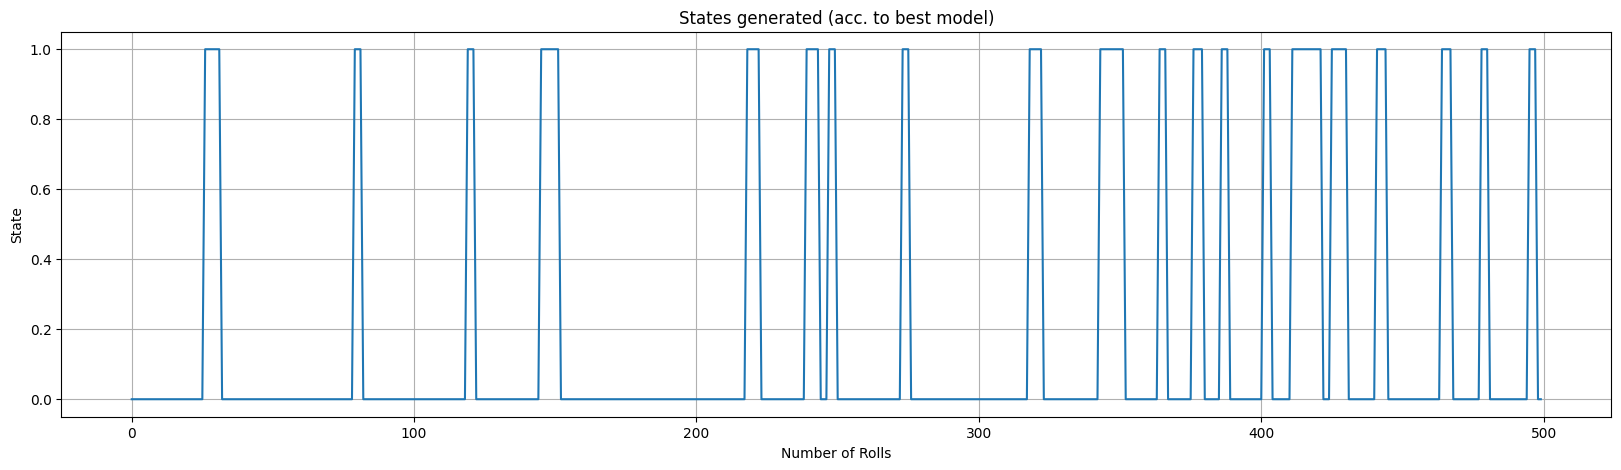

State 0 : Fair Die
State 1 : Loaded Die


In [20]:
n = rolls.shape[0]
rolls_train = rolls[:n//2] 
rolls_val = rolls[n//2:] 

rand_seed = 13
num_models = 50
start_prob = np.array([1.0,0])
transition_prob = np.array([np.random.dirichlet([0.9, 0.1]),np.random.dirichlet([0.1, 0.9])])

best_model, best_score = getBestModel(num_models,rand_seed,start_prob,transition_prob,rolls_train, rolls_val)

print('-------------------------------------------------------')
print(f'Best score:      {best_score}')
print('-------------------------------------------------------')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = best_model.predict(rolls)


num_disp_states = 500
plt.figure(figsize=(20,5))
plt.plot(states[:num_disp_states])
plt.title('States generated (acc. to best model)')
plt.xlabel('Number of Rolls')
plt.ylabel('State')
plt.grid()
plt.show()

print('State 0 : Fair Die')
print('State 1 : Loaded Die')


### Most Likely sequence of states

Most likely sequence of hidden states : 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 

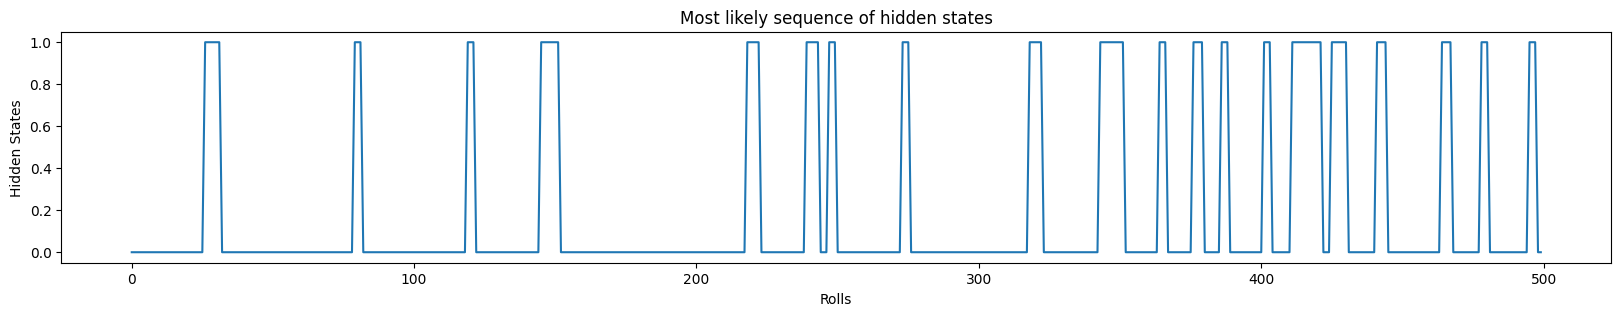

In [21]:
predicted_states = best_model.predict(rolls_train)
print("Most likely sequence of hidden states : ", end="")
for i in predicted_states:
    print(i, end=" ")


N = 500
plt.figure(figsize=(20,3))
plt.plot(predicted_states[:N])
plt.xlabel('Rolls')
plt.ylabel('Hidden States')
plt.title("Most likely sequence of hidden states")
plt.show()


### Switching probabilities

In [22]:
print('The casino is switching between fair(0) and loaded(1) states according to the transition matrix : \n')
print(f'Transmission Matrix:\n{best_model.transmat_.round(3)}\n\n')

The casino is switching between fair(0) and loaded(1) states according to the transition matrix : 

Transmission Matrix:
[[0.838 0.162]
 [0.43  0.57 ]]




### Emission Probabilities of Loaded State

In [23]:
print('The probabilities of numbers in the loaded die are : \n')
print(f'Emission Prob :\n{best_model.emissionprob_[1].round(3)}\n\n')


The probabilities of numbers in the loaded die are : 

Emission Prob :
[0.098 0.108 0.094 0.049 0.04  0.61 ]


